In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score
from ucimlrepo import fetch_ucirepo

from DBScan import DBScan
from KMeans import KMeans

%matplotlib inline

## Clustering Algorithms from scratch

In [2]:
# fetch dataset from UCIrvine repo
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes) 
X = np.asarray(iris.data.features, dtype=np.float32)
y = np.asarray(pd.factorize(iris.data.targets['class'])[0], dtype=np.int16)



In [3]:
k_means = KMeans(k=3, max_iterations=50, metric='euclidean')
k_means.fit(X)
_, pi, mus = k_means.transform()
c_labels_euclid = np.argwhere(pi == 1)[:, 1]

In [4]:
k_means = KMeans(k=3, max_iterations=50, metric='cosine')
k_means.fit(X)
_, pi, mus = k_means.transform()
c_labels_cosine = np.argwhere(pi == 1)[:, 1]

In [12]:
dbscan = DBScan(epsilon=0.05, min_pts=50, metric='cosine')
dbscan.fit(X)
db_clusters = dbscan.transform()
print(np.unique(db_clusters))

[1 2 3]


### Visualizing clusters with PCA

In [6]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


Text(0.5, 1.0, 'Iris: PCA, true labels')

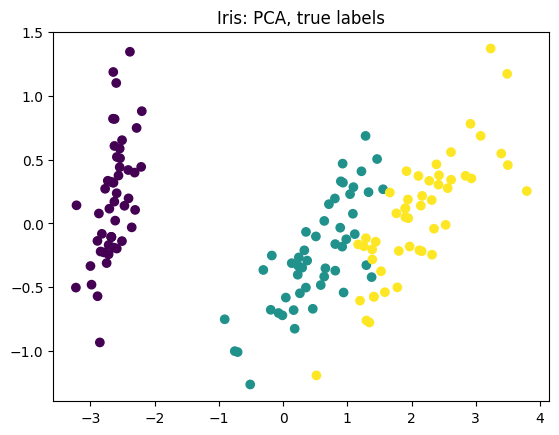

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Iris: PCA, true labels")

Text(0.38, 0.83, 'Mutual info score: 0.58')

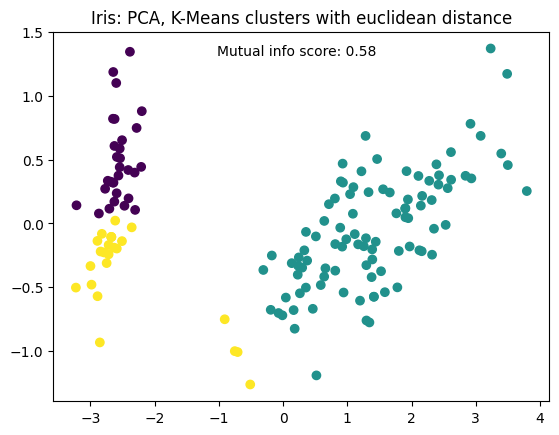

In [16]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=c_labels_euclid)
plt.title("Iris: PCA, K-Means clusters with euclidean distance")
plt.figtext(0.38, 0.83, f"Mutual info score: {adjusted_mutual_info_score(y, c_labels_euclid):.2f}")

Text(0.38, 0.83, 'Mutual info score: 0.65')

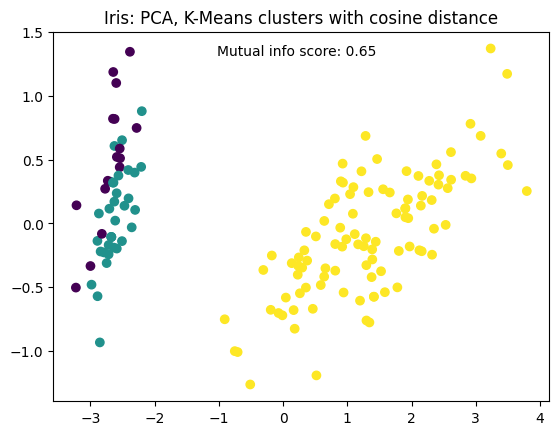

In [17]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=c_labels_cosine)
plt.title("Iris: PCA, K-Means clusters with cosine distance")
plt.figtext(0.38, 0.83, f"Mutual info score: {adjusted_mutual_info_score(y, c_labels_cosine):.2f}")


Text(0.38, 0.83, 'Mutual info score: 0.77')

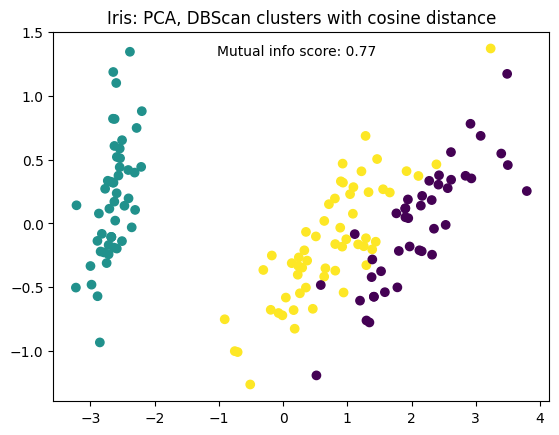

In [18]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=db_clusters)
plt.title("Iris: PCA, DBScan clusters with cosine distance")
plt.figtext(0.38, 0.83, f"Mutual info score: {adjusted_mutual_info_score(y, db_clusters):.2f}")